In [1]:
"""  Created on Sep 9 
     @author: Darly Castro
     ------  Librerias  ------
"""

import numpy as np
from scipy.integrate import simps
from scipy import interpolate 
from filon import cos_integral
from filon import sin_integral
import matplotlib.pyplot as plt


In [2]:
def Vpot(x,y,Lx,Ly):
    Vpot = 0
    r=(x)**2+(y)**2 + 0.01
    Vpot = -2.0/np.sqrt(r)
    return Vpot


In [3]:
# guarda los parámetros necesarios para la integración con FILON
# kindex, mindex, VS
def arrays_vpot(Lx,Ly,Nelectron): 
    #---------# Electron position-------------
    XE_grid = np.linspace(0, Lx, Nelectron)
    YE_grid = np.linspace(0, Ly, Nelectron)
    #-------------------   # Potential#  --------------------------------
    VS=np.zeros(shape=(Nelectron,Nelectron))
    VS1=np.zeros(shape=(Nelectron,Nelectron))
    for k in range(1, Nelectron+1):
        for m in range(1, Nelectron+1):
            xe = XE_grid[k-1] 
            ye = YE_grid[m-1] 
            VS[k-1,m-1] = Vpot(xe-0.5*Lx,ye-0.5*Ly,Lx,Ly)
    return VS,XE_grid,YE_grid

In [85]:
Lx = 10
Ly = 10
Nelectron= 201

In [86]:
VS,XE_grid,YE_grid=arrays_vpot(Lx,Ly,Nelectron) 
VS.min(), VS.max()

(-20.0, -0.2828144324453053)

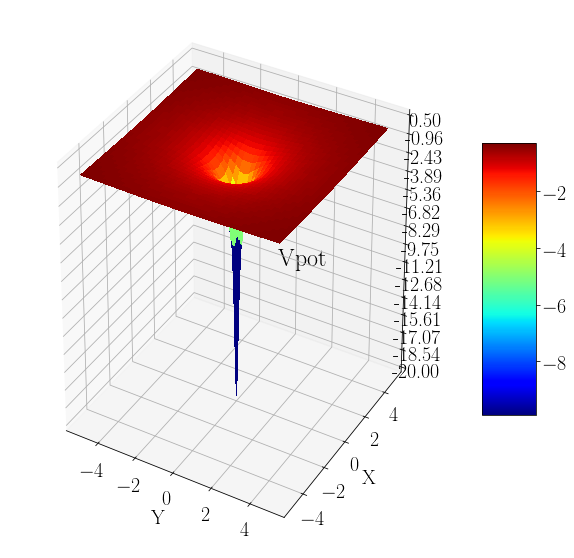

In [87]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

# Make data.
X = XE_grid - 0.5*Lx
Y = YE_grid - 0.5*Ly
X, Y = np.meshgrid(X, Y)
Z = VS
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(VS.min(), 0.5)
ax.zaxis.set_major_locator(LinearLocator(15))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel(r'Y' , labelpad=8,fontsize=20,fontweight='bold', horizontalalignment='center')           
ax.set_ylabel(r'X',labelpad=8,fontsize=20,fontweight='bold', horizontalalignment ='center')     

# Add a color bar which maps values to colors.
#m = cm.ScalarMappable(cmap=cm.jet)
#m.set_array(Z)
#plt.colorbar(m)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlabel(r'Vpot',labelpad=-100,fontsize=24,fontweight='bold' )#, horixontalalignment ='center')     

plt.show()

### $$ \int_0^{L_x/2}\int_0^{L_y/2}  V(u,w) cos \frac{\pi k}{L_x}u cos \frac{\pi m }{L_y} w \,  du \, dw$$

In [88]:
    Ne=Nelectron
    Ne_fine= Ne+100
#------------------------------------------------------------------------------
    dx=0.5*Lx/(Ne)
    dy=0.5*Ly/(Ne)
#-------------------------------------------------------------------------------
    dx1=1.0/(Ne_fine)
    dy1=1.0/(Ne_fine)
#---------------------------------------------------------------------------------------------------   
    kindex = np.zeros(Ne)
    mindex = np.zeros(Ne)
#----------------------------------------------------------------------------------------------------          
    p1 = np.zeros(shape=(Ne,Ne))
    I1 = np.zeros(shape=(Ne,Ne))
    SP1 = np.zeros(shape=(Ne,Ne))
    I2 = np.zeros(shape=(Ne,Ne))
#----------------------------------------------------------------------------------------------------          
    for k in range(1, Ne+1):
        for m in range(1, Ne+1):
            kindex[k-1] = (k*np.pi/Lx)
            mindex[m-1] = (m*np.pi/Ly)
    for m in range(0,Ne):
        p1[:,m] = (4/(Lx*Ly))*(cos_integral(VS[:,m],dx1, mindex, x0=0, axis=0) + cos_integral(VS[:,m],dx, mindex, x0=1, axis=0) ) 

In [105]:
(cos_integral(VS[:,0],dx1, kindex, x0=0, axis=0) + cos_integral(VS[:,0],dx, kindex, x0=1, axis=0) ) 

array([-9.62906900e-01,  4.57348672e-01,  4.09793278e-01, -1.64014822e-01,
       -6.56489312e-02,  9.38733595e-02, -1.24634059e-01, -1.59560343e-01,
       -6.45583624e-03, -9.24139605e-02, -1.88504702e-01, -6.98242150e-02,
       -4.63466162e-02, -1.37348960e-01, -7.02731148e-02,  1.75106512e-02,
       -3.69980083e-02, -2.48926092e-02,  7.62308786e-02,  6.38037284e-02,
        2.97250907e-02,  1.01301871e-01,  1.20122812e-01,  5.99446014e-02,
        8.03744835e-02,  1.13973042e-01,  5.40804315e-02,  2.69093655e-02,
        6.07948180e-02,  2.49184695e-02, -2.79908542e-02, -3.51717500e-03,
       -3.53363089e-03, -5.51452162e-02, -4.53562082e-02, -1.40541798e-02,
       -4.45482179e-02, -5.10287421e-02, -6.21440442e-03, -9.13432442e-03,
       -2.94514236e-02,  7.14061067e-03,  2.61704217e-02, -9.98508273e-04,
        1.22494148e-02,  4.13891728e-02,  1.77052202e-02,  5.29082923e-03,
        3.26612104e-02,  2.23780978e-02, -6.12470651e-03,  1.11970690e-02,
        1.89406515e-02, -

In [106]:
def INT_2DFILON(Lx,Ly,Ne,VS):
    Ne_fine= Ne+100
#------------------------------------------------------------------------------
    dx=0.5*Lx/(Ne)
    dy=0.5*Ly/(Ne)
#-------------------------------------------------------------------------------
    dx1=1.0/(Ne_fine)
    dy1=1.0/(Ne_fine)
#---------------------------------------------------------------------------------------------------   
    kindex = np.zeros(Ne)
    mindex = np.zeros(Ne)
#----------------------------------------------------------------------------------------------------          
    PP1 = np.zeros(shape=(Ne,Ne))
    I1 = np.zeros(shape=(Ne,Ne))
    SP1 = np.zeros(shape=(Ne,Ne))
    I2 = np.zeros(shape=(Ne,Ne))
#----------------------------------------------------------------------------------------------------          
    for k in range(1, Ne+1):
        for m in range(1, Ne+1):
            kindex[k-1] = (k*np.pi/Lx)
            mindex[m-1] = (m*np.pi/Ly) 
#----------------------------------------------------------------------------------------------------
#integration over x
    #for m in range(0,Ne):
    for k in range(0,Ne):
       # P1 = (cos_integral(VS[:,k],dx1, kindex, x0=0, axis=0) + cos_integral(VS[:,k],dx, kindex, x0=1, axis=0) ) 
        PP1[:,k] = (cos_integral(VS[:,k],dx1, kindex, x0=0, axis=0) + cos_integral(VS[:,k],dx, kindex, x0=1, axis=0) ) 
        SP1[:,k] = (sin_integral(VS[:,k],dx1, kindex, x0=0, axis=0) + sin_integral(VS[:,k],dx, kindex, x0=1, axis=0) ) 
#integration over y   
    for k in range(0,Ne):
        I1[k,:] = (4/(Lx*Ly))*(cos_integral( PP1[k,:],dy1, mindex, x0=0.0, axis=0) + cos_integral( PP1[k,:],dy, mindex, x0=1.0, axis=0) ) 
        I2[k,:] = (4/(Lx*Ly))*(sin_integral( SP1[k,:],dy1, mindex, x0=0.0, axis=0) + sin_integral( SP1[k,:],dy, mindex, x0=1.0, axis=0) ) 
        
    return I1,I2,kindex,mindex

In [107]:
COEF_2D,SIEF_2D,mindex,kindex= INT_2DFILON(Lx,Ly,Nelectron,VS)
#plt.plot(COEF_2D)

# Convergencia Potencial

In [91]:
sum(VS[,:])

-39.63238364505654

In [30]:
COEF = COEF_2D 
SIN_C =SIEF_2D

#Convergencia 
NP= Nelectron
sumav = np.zeros(shape=(NP,NP,NP,NP))
suma1 = np.zeros(shape=(NP,NP))
# m:  ------> index for y
# k:  ------> index for x
for i in range(0,NP): 
    for j in range(0,NP): 
        for k in range(0,NP): 
            for m in range(0,NP): 
                sumav[i,j,k,m] =  SIN_C[k,m]*np.sin(kindex[k]*(XE_grid[i]-Lx*0.5))*np.sin(mindex[m]*(YE_grid[j]-0.5*Ly)) + COEF[k,m]*np.cos(mindex[m]*(YE_grid[j]-0.5*Ly))*np.cos(kindex[k]*(XE_grid[i]-0.5*Lx))
        #sumav[i,j,k,m] =  (COEF[k,m]*np.cos(mindex[m]*YE_grid[i])*np.cos(kindex[k]*XE_grid[j])  + SIN_C[k,m]*np.sin(kindex[k]*XE_grid[j])*np.sin(mindex[m]*YE_grid[i] ))

        


In [97]:
sum(sumav[1,2,7,:])

-0.03170607352051558

In [98]:
suma1 = np.zeros(shape=(NP,NP))
for i in range(0,NP): 
    for j in range(0,NP):
        suma_x = sum(sumav[i,j,i,:])
        suma1[i,j] = suma_x

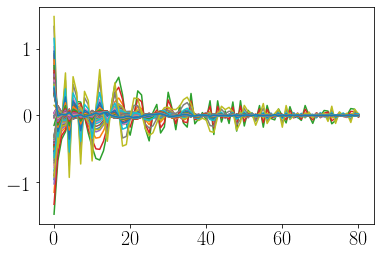

In [103]:
plt.plot(suma1)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

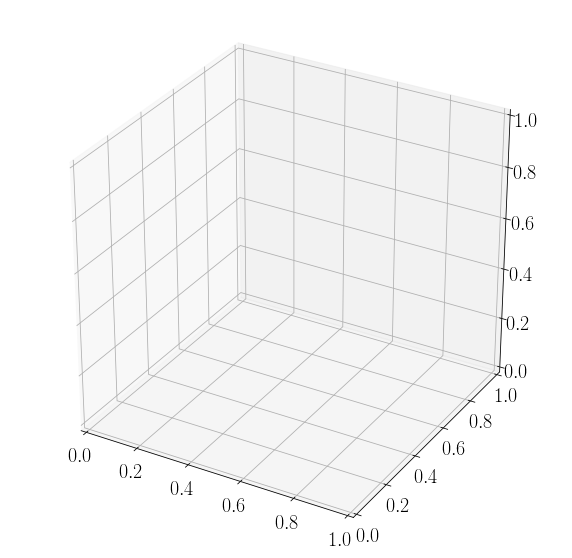

In [101]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

# Make data.
Y = XE_grid - 0.5*Lx
X = YE_grid - 0.5*Ly
X, Y = np.meshgrid(X, Y)
Z = suma1
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet,
                       linewidth=0, antialiased=True)

# Customize the z axis.
#ax.set_zlim(VS.min(), 0.5)
ax.zaxis.set_major_locator(LinearLocator(15))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel(r'Y' , labelpad=8,fontsize=20,fontweight='bold', horizontalalignment='center')           
ax.set_ylabel(r'X',labelpad=8,fontsize=20,fontweight='bold', horizontalalignment ='center')     

# Add a color bar which maps values to colors.
#m = cm.ScalarMappable(cmap=cm.jet)
#m.set_array(Z)
#plt.colorbar(m)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlabel(r'Vpot',labelpad=-100,fontsize=24,fontweight='bold' )#, horixontalalignment ='center')     

plt.show()

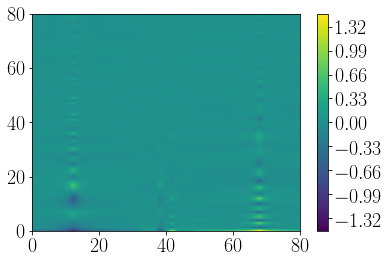

In [104]:

import matplotlib.pyplot as plt

x = np.array(range(0,1))
y = np.array(range(0,1))
#data = x[:,None]+y[None,:]

X,Y = np.meshgrid(x,y)
#vmin = -1
#vmax = 1

#My attempt
fig,ax = plt.subplots()
contourf_ = ax.contourf(suma1, 100 ) #, vmin=vmin, vmax=vmax)
cbar = fig.colorbar(contourf_)
#cbar.set_clim( vmin, vmax )

In [92]:
COEF_2D[:,:].max(), COEF_2D[:,:].min()

(0.15402602112320593, -0.21531246190443937)

In [93]:
def schr(COE,Lx,Ly,Nelectron):
    ndx=int(Nelectron/2)
    ndy=int(Nelectron/2)
    AR=np.zeros(shape=(ndx*ndy,ndx*ndy)) # Empty Array "2Dimencional"
    eigenvalues= np.zeros(shape=(ndx*ndy))
    eigenvectors = np.zeros(shape=(ndx*ndy,ndx*ndy)) 
    Exact = np.zeros(ndx*ndy)
    P  = np.zeros(ndx*ndy)
    P1 = np.zeros(ndx*ndy)
    p=0
    for k in range(1,ndx+1):
        for m in range(1,ndy+1):
            p  = p+1  # -4/(2n-1)**2
            p1 = 0
            Exact[p-1]=  -4/((2*p-1)**2/Lx**2  + (2*p1-1)**2/Ly**2)
            for k1 in range(1,ndx+1):
                for m1 in range(1,ndy+1):
                    p1= p1+1
                    ka=abs(k-k1)
                    ma=abs(m-m1)
                    ks=k+k1
                    ms=m+m1 
                    AR[p-1,p1-1] = COE[ka,ma] + COE[ks,ms] - COE[ks,ma] - COE[ka,ms]
                    if (p == p1):
                        AR[p-1,p1-1] = AR[p-1,p1-1] + (np.pi*k/Lx)**2 + (np.pi*m/Ly)**2          
                    #eigenvalues ,eigenvectors = np.linalg.eigh(AR)
    eigenvalues,eigenvectors= np.linalg.eigh(AR)
    return eigenvalues, eigenvectors, Exact


In [94]:
Eigen,VEC_R,Exac = schr(COEF_2D,Lx,Ly,Nelectron)

In [95]:
Eigen[0:10],Exac

(array([-1.88145662, -0.56019676, -0.08099228,  0.20254026,  0.3985377 ,
         0.57405283,  0.66255853,  1.05099827,  1.13007173,  1.47044001]),
 array([-2.00000000e+02, -4.00000000e+01, -1.53846154e+01, ...,
        -1.00050019e-06, -1.00030007e-06, -1.00010001e-06]))

In [114]:
Eigen[0:10] #,Exac[0:10]

array([0.19739209, 0.49348022, 0.49348022, 0.78956835, 0.98696044,
       0.98696044, 1.28304857, 1.28304857, 1.67783275, 1.67783275])

Text(0.5, 0, 'k')

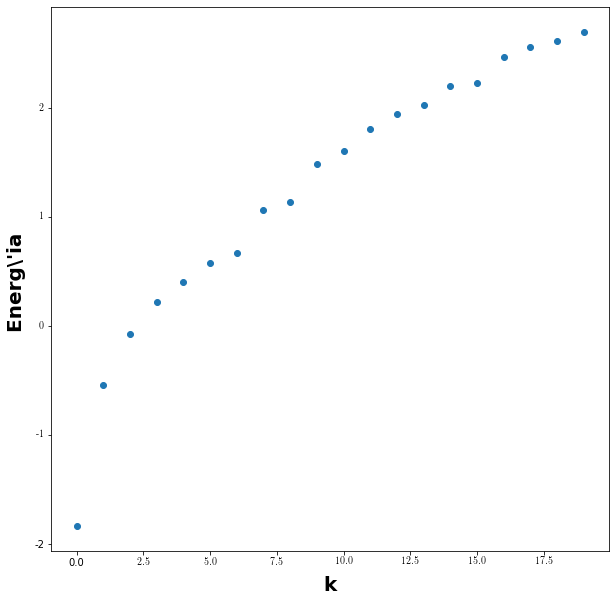

In [74]:
fig, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ax1.plot(range(0,20), Eigen[0:20],'o' )

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 


#ax1.set_ylim(0,0.5)
#ax1.set_xlim(-1.8,0)


ax1.set_ylabel(r'Energ\'ia ',labelpad=8,fontsize=20,fontweight='bold', horizontalalignment ='center')
ax1.set_xlabel(r'k',labelpad=8,fontsize=20,fontweight='bold', horizontalalignment ='center')




#ax1.set_xlabel(r'Energ\'ia \, ($Ry^*$)' , labelpad=8,fontsize=24,fontweight='bold', horizontalalignment='center')           
#ax1.set_ylabel(r'Densidad de Estados',labelpad=8,fontsize=24,fontweight='bold', horizontalalignment ='center')     

#plt.savefig('Arc_DOS_SD.pdf',format='pdf', dpi=1000,bbox_inches="tight")



In [ ]:

#  w : (…, M) ndarray  #The eigenvalues in ascending order, each repeated according to its multiplicity.

#  v : {(…, M, M) ndarray, (…, M, M) matrix}  #The column v[:, i] is the normalized eigenvector corresponding to the eigenvalue w[i]. Will return a matrix object if a is a matrix object


#--------- Wave Function: -----------
#VecR = Cn = Eigenvectors 
# 1 component : different electric fields  : nF: 20
# 2 component : different donor positions  : Ndonor 10 
# 3 component : nd  numbers of row egeinvectores  100
# 4 component : nd numbers of colums egeinvectores 100

